## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





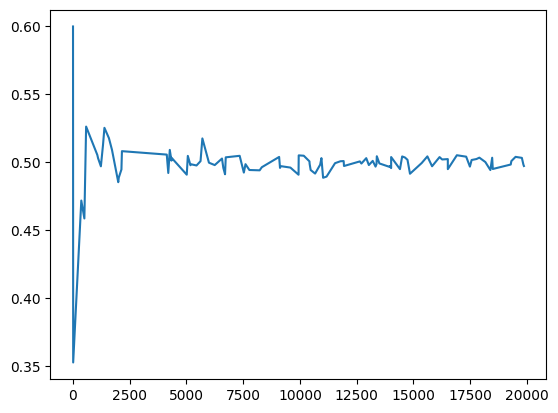

In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt

def lancio(n):
    lanci = []
    for i in range(n):
        #0 = croce, 1 = testa
        lanci.append(random.randint(0,1))
        
    lanci = np.array(lanci) 
    media = lanci.mean()   
    return media
    
Nlanci = []
FreqLanci = []
for i in range(100):
    x = random.randint(10, 20000)
    Nlanci.append(x)

Nlanci.sort() 
for i in range(100):
    FreqLanci.append(lancio(Nlanci[i]))  
    
plt.plot(Nlanci, FreqLanci)  

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


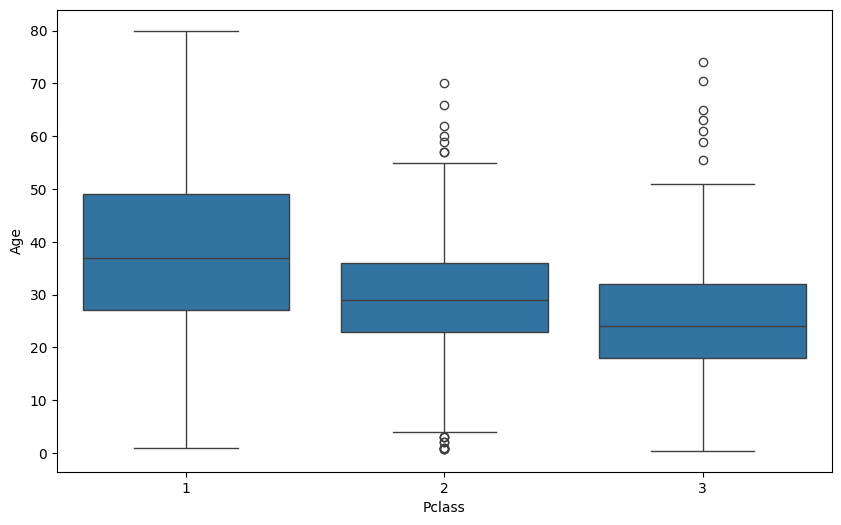

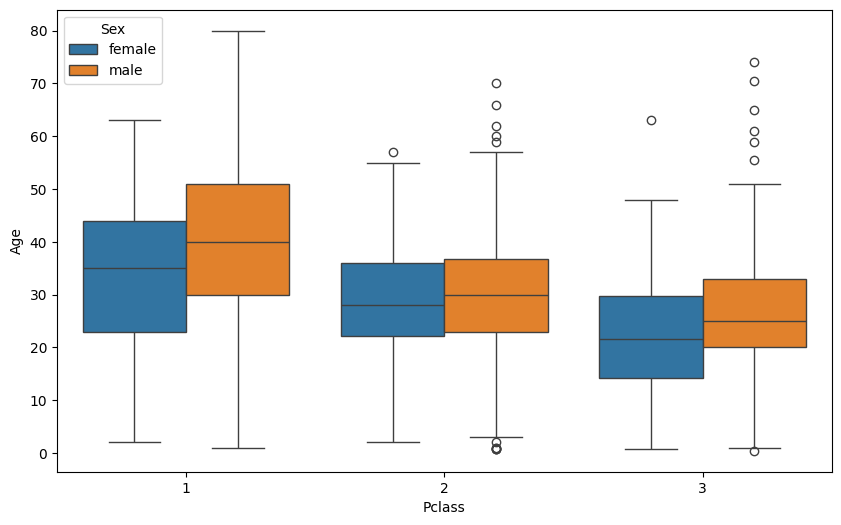

In [115]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(df.head(3))

df.shape

print(df.isnull().sum())

df['Embarked'].mode()[0]
df['Embarked'].fillna('S', inplace=True)

df.dropna(subset=['Age'], inplace=True)
df.shape

df[df.duplicated()]
df.duplicated().sum()

Eta = df.groupby('Pclass')['Age'].mean()

print(Eta)
plt.figure(figsize=(10, 6))
sns.boxplot(df, x='Pclass', y='Age')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(df, x='Pclass', y='Age',  hue='Sex')
plt.show()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


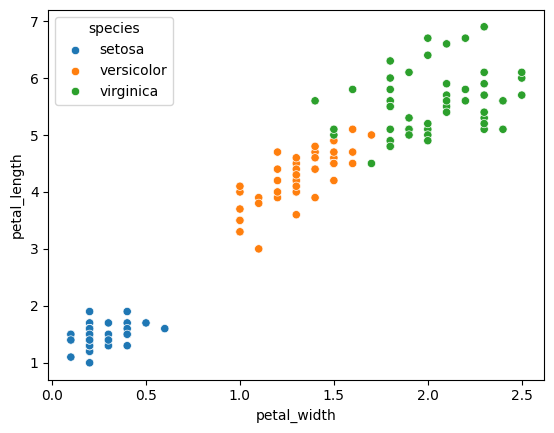

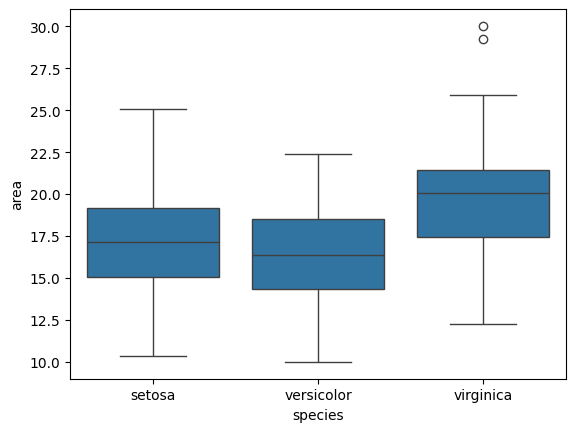

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
print(df.head())

df['species'].value_counts()
df.groupby('species')['petal_length'].mean()
df.groupby('species')['petal_width'].mean()

sns.scatterplot(df, x='petal_width', y='petal_length', hue='species')
plt.show()
df['area'] = df['sepal_length'] * df['sepal_width']
df.head(2)

sns.boxplot(df, x='species', y='area')
plt.show()
